In [207]:
# our main objective is to find the winning team after the toss decision 

In [208]:
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Packages for Visualisation 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [209]:
from sklearn import metrics


In [210]:
byb=pd.read_csv('U:/archive (1)/IPL Ball-by-Ball 2008-2020.csv')
match= pd.read_csv('U:/archive (1)/IPL Matches 2008-2020.csv')

In [211]:
byb


,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [212]:
match


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [213]:
print(byb.columns)
print(match.columns)

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')
Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')


In [214]:
byb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [215]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [216]:
# Checking match win total null values
match['winner'].isnull().sum()

4

In [217]:
match[match['result']=='tie']

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
66,392190,Cape Town,2009-04-23,YK Pathan,Newlands,1,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,Y,NaN,MR Benson,M Erasmus
130,419121,Chennai,2010-03-21,J Theron,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,Y,NaN,K Hariharan,DJ Harper
328,598004,Hyderabad,2013-04-07,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,Y,NaN,AK Chaudhary,S Ravi
341,598017,Bangalore,2013-04-16,V Kohli,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,M Erasmus,VA Kulkarni
416,729315,Abu Dhabi,2014-04-29,JP Faulkner,Sheikh Zayed Stadium,1,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,Y,NaN,Aleem Dar,AK Chaudhary
476,829741,Ahmedabad,2015-04-21,SE Marsh,"Sardar Patel Stadium, Motera",0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,Y,NaN,M Erasmus,S Ravi
610,1082625,Rajkot,2017-04-29,KH Pandya,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,Y,NaN,AK Chaudhary,CB Gaffaney
705,1175365,Delhi,2019-03-30,PP Shaw,Feroz Shah Kotla,0,Delhi Capitals,Kolkata Knight Riders,Delhi Capitals,field,Delhi Capitals,tie,NaN,Y,NaN,AY Dandekar,Nitin Menon
746,1178426,Mumbai,2019-05-02,JJ Bumrah,Wankhede Stadium,0,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,Mumbai Indians,tie,NaN,Y,NaN,CK Nandan,S Ravi
757,1216493,Dubai,2020-09-20,MP Stoinis,Dubai International Cricket Stadium,0,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,Delhi Capitals,tie,NaN,Y,NaN,AK Chaudhary,Nitin Menon


In [218]:
match= match.drop(index=[66,130,328,341,416,476,610,705,746,757,776,781,811])
 
match

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,1216546,Dubai,2020-10-20,S Dhawan,Dubai International Cricket Stadium,0,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,Kings XI Punjab,wickets,5.0,N,NaN,C Shamshuddin,RK Illingworth
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [219]:
# Checking the no match each team won
match['winner'].value_counts()

Mumbai Indians                 118
Chennai Super Kings            106
Kolkata Knight Riders           98
Royal Challengers Bangalore     89
Kings XI Punjab                 85
Rajasthan Royals                79
Delhi Daredevils                67
Sunrisers Hyderabad             65
Deccan Chargers                 29
Delhi Capitals                  17
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [220]:
match['team1'].value_counts()

Royal Challengers Bangalore    106
Mumbai Indians                  95
Chennai Super Kings             93
Kings XI Punjab                 92
Kolkata Knight Riders           92
Delhi Daredevils                83
Rajasthan Royals                69
Sunrisers Hyderabad             58
Deccan Chargers                 39
Pune Warriors                   23
Delhi Capitals                  17
Gujarat Lions                   15
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Rising Pune Supergiant           7
Name: team1, dtype: int64

In [221]:
match['team2'].value_counts()

Mumbai Indians                 104
Kolkata Knight Riders           96
Kings XI Punjab                 94
Rajasthan Royals                89
Royal Challengers Bangalore     86
Chennai Super Kings             84
Delhi Daredevils                77
Sunrisers Hyderabad             63
Deccan Chargers                 36
Pune Warriors                   23
Gujarat Lions                   14
Delhi Capitals                  14
Rising Pune Supergiant           9
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Name: team2, dtype: int64

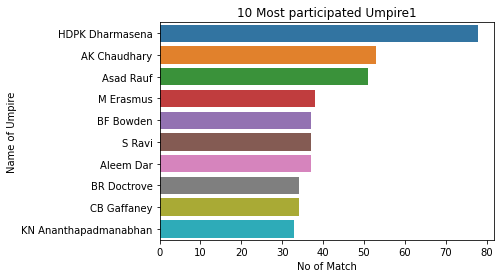

In [222]:
# Top 10 Umpire1 & 2 value count

sns.barplot(x=match['umpire1'].value_counts().head(10).values,
            y=match['umpire1'].value_counts().head(10).index,
            data= match
           )
plt.xlabel("No of Match")
plt.ylabel("Name of Umpire")
plt.title('10 Most participated Umpire1')
plt.show()

In [223]:
team_encodings = {
    'Mumbai Indians' : 1,
    'Kolkata Knight Riders' : 2,
    'Royal Challengers Bangalore' : 3,
    'Deccan Chargers' : 4,
    'Chennai Super Kings' : 5,
    'Rajasthan Royals' : 6,
    'Delhi Daredevils' : 7,
    'Gujarat Lions' : 8,
    'Kings XI Punjab' : 9,
    'Sunrisers Hyderabad' : 10,
    'Rising Pune Supergiants' : 11,
    'Rising Pune Supergiant' : 11,
    'Kochi Tuskers Kerala' : 12,
    'Pune Warriors' : 13,
    'Delhi Capitals' : 14,
    'Draw' : 15
    
    
}

team_encode_dict = {
    'team1' : team_encodings,
    'team2' : team_encodings,
    'toss_winner' : team_encodings,
    'winner' : team_encodings
}

match.replace(team_encode_dict, inplace = True)
match.head(10)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,3,2,3,field,2.0,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,9,5,5,bat,5.0,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,7,6,6,bat,7.0,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,1,3,1,bat,3.0,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,2,4,4,bat,2.0,wickets,5.0,N,NaN,BF Bowden,K Hariharan
5,335987,Jaipur,2008-04-21,SR Watson,Sawai Mansingh Stadium,0,6,9,9,bat,6.0,wickets,6.0,N,NaN,Aleem Dar,RB Tiffin
6,335988,Hyderabad,2008-04-22,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",0,4,7,4,bat,7.0,wickets,9.0,N,NaN,IL Howell,AM Saheba
7,335989,Chennai,2008-04-23,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,5,1,1,field,5.0,runs,6.0,N,NaN,DJ Harper,GA Pratapkumar
8,335990,Hyderabad,2008-04-24,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",0,4,6,6,field,6.0,wickets,3.0,N,NaN,Asad Rauf,MR Benson
9,335991,Chandigarh,2008-04-25,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",0,9,1,1,field,9.0,runs,66.0,N,NaN,Aleem Dar,AM Saheba


In [224]:
# missing values in city col
match['city'].value_counts()

Mumbai            100
Kolkata            77
Delhi              73
Bangalore          64
Hyderabad          63
Chandigarh         56
Chennai            56
Jaipur             47
Pune               38
Abu Dhabi          27
Dubai              23
Durban             15
Bengaluru          15
Visakhapatnam      13
Centurion          12
Sharjah            12
Ahmedabad          11
Rajkot              9
Dharamsala          9
Indore              9
Johannesburg        8
Port Elizabeth      7
Ranchi              7
Cuttack             7
Cape Town           6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [225]:
match[match['city'].isnull() == True]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
399,729281,NaN,2014-04-17,YS Chahal,Sharjah Cricket Stadium,1,7,3,3,field,3.0,wickets,8.0,N,NaN,Aleem Dar,S Ravi
402,729287,NaN,2014-04-19,PA Patel,Dubai International Cricket Stadium,1,3,1,3,field,3.0,wickets,7.0,N,NaN,Aleem Dar,AK Chaudhary
403,729289,NaN,2014-04-19,JP Duminy,Dubai International Cricket Stadium,1,2,7,2,bat,7.0,wickets,4.0,N,NaN,Aleem Dar,VA Kulkarni
404,729291,NaN,2014-04-20,GJ Maxwell,Sharjah Cricket Stadium,1,6,9,9,field,9.0,wickets,7.0,N,NaN,BF Bowden,M Erasmus
406,729295,NaN,2014-04-22,GJ Maxwell,Sharjah Cricket Stadium,1,9,10,10,field,9.0,runs,72.0,N,NaN,M Erasmus,S Ravi
407,729297,NaN,2014-04-23,RA Jadeja,Dubai International Cricket Stadium,1,6,5,6,field,5.0,runs,7.0,N,NaN,HDPK Dharmasena,RK Illingworth
408,729299,NaN,2014-04-24,CA Lynn,Sharjah Cricket Stadium,1,3,2,3,field,2.0,runs,2.0,N,NaN,Aleem Dar,VA Kulkarni
409,729301,NaN,2014-04-25,AJ Finch,Dubai International Cricket Stadium,1,10,7,10,bat,10.0,runs,4.0,N,NaN,M Erasmus,S Ravi
410,729303,NaN,2014-04-25,MM Sharma,Dubai International Cricket Stadium,1,5,1,1,bat,5.0,wickets,7.0,N,NaN,BF Bowden,M Erasmus
413,729309,NaN,2014-04-27,M Vijay,Sharjah Cricket Stadium,1,7,1,1,bat,7.0,wickets,6.0,N,NaN,Aleem Dar,VA Kulkarni


In [226]:
match = match.drop(index=[399,402,403,404,406,407,408,409,410,413,414,415,417])
 
match

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,3,2,3,field,2.0,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,9,5,5,bat,5.0,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,7,6,6,bat,7.0,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,1,3,1,bat,3.0,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,2,4,4,bat,2.0,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,1216546,Dubai,2020-10-20,S Dhawan,Dubai International Cricket Stadium,0,14,9,14,bat,9.0,wickets,5.0,N,NaN,C Shamshuddin,RK Illingworth
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,1,14,14,field,1.0,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,3,10,10,field,10.0,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,14,10,14,bat,14.0,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [227]:
#dropping the redundant columns
match = match[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
match

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,3,2,Bangalore,field,3,M Chinnaswamy Stadium,2.0
1,9,5,Chandigarh,bat,5,"Punjab Cricket Association Stadium, Mohali",5.0
2,7,6,Delhi,bat,6,Feroz Shah Kotla,7.0
3,1,3,Mumbai,bat,1,Wankhede Stadium,3.0
4,2,4,Kolkata,bat,4,Eden Gardens,2.0
...,...,...,...,...,...,...,...
810,14,9,Dubai,bat,14,Dubai International Cricket Stadium,9.0
812,1,14,Dubai,field,14,Dubai International Cricket Stadium,1.0
813,3,10,Abu Dhabi,field,10,Sheikh Zayed Stadium,10.0
814,14,10,Abu Dhabi,bat,14,Sheikh Zayed Stadium,14.0


In [228]:
match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790 entries, 0 to 815
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   team1          790 non-null    int64  
 1   team2          790 non-null    int64  
 2   city           790 non-null    object 
 3   toss_decision  790 non-null    object 
 4   toss_winner    790 non-null    int64  
 5   venue          790 non-null    object 
 6   winner         786 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 49.4+ KB


In [229]:
from sklearn.preprocessing import LabelEncoder

ftr_list = ['city','toss_decision','venue']
encoder = LabelEncoder()
for ftr in ftr_list:
    match[ftr] = encoder.fit_transform(match[ftr])
    print(encoder.classes_)
match    

['Abu Dhabi' 'Ahmedabad' 'Bangalore' 'Bengaluru' 'Bloemfontein'
 'Cape Town' 'Centurion' 'Chandigarh' 'Chennai' 'Cuttack' 'Delhi'
 'Dharamsala' 'Dubai' 'Durban' 'East London' 'Hyderabad' 'Indore' 'Jaipur'
 'Johannesburg' 'Kanpur' 'Kimberley' 'Kochi' 'Kolkata' 'Mumbai' 'Nagpur'
 'Port Elizabeth' 'Pune' 'Raipur' 'Rajkot' 'Ranchi' 'Sharjah'
 'Visakhapatnam']
['bat' 'field']
['Barabati Stadium' 'Brabourne Stadium' 'Buffalo Park'
 'De Beers Diamond Oval' 'Dr DY Patil Sports Academy'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Dubai International Cricket Stadium' 'Eden Gardens' 'Feroz Shah Kotla'
 'Green Park' 'Himachal Pradesh Cricket Association Stadium'
 'Holkar Cricket Stadium' 'JSCA International Stadium Complex' 'Kingsmead'
 'M Chinnaswamy Stadium' 'M.Chinnaswamy Stadium'
 'MA Chidambaram Stadium, Chepauk'
 'Maharashtra Cricket Association Stadium' 'Nehru Stadium'
 'New Wanderers Stadium' 'Newlands' 'OUTsurance Oval'
 'Punjab Cricket Association IS Bindra Stadium, Mohali'


,team1,team2,city,toss_decision,toss_winner,venue,winner
0,3,2,2,1,3,14,2.0
1,9,5,7,0,5,23,5.0
2,7,6,10,0,6,8,7.0
3,1,3,23,0,1,35,3.0
4,2,4,22,0,4,7,2.0
...,...,...,...,...,...,...,...
810,14,9,12,0,14,6,9.0
812,1,14,12,1,14,6,1.0
813,3,10,0,1,10,30,10.0
814,14,10,0,0,14,30,14.0


In [230]:
is_NaN = match.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = match[row_has_NaN]

print(rows_with_NaN)

     team1  team2  city  toss_decision  toss_winner  venue  winner
241      7     13    10              0            7      8     NaN
486      3      6     2              1            6     14     NaN
511      3      7     2              1            3     14     NaN
744      3      6     3              1            6     15     NaN


In [231]:
match_df = match.drop(index=[241,486,511,744])
 
match_df

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,3,2,2,1,3,14,2.0
1,9,5,7,0,5,23,5.0
2,7,6,10,0,6,8,7.0
3,1,3,23,0,1,35,3.0
4,2,4,22,0,4,7,2.0
...,...,...,...,...,...,...,...
810,14,9,12,0,14,6,9.0
812,1,14,12,1,14,6,1.0
813,3,10,0,1,10,30,10.0
814,14,10,0,0,14,30,14.0


In [232]:
#Machine Learning alogorithm 

In [233]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(match_df,test_size=0.2, random_state=5)
print(train_df.shape)
print(test_df.shape)

(628, 7)
(158, 7)


In [234]:
# Importing packages for Predictions 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import cross_val_score


def print_model_scores(model, data, predictor, target):
    model.fit(data[predictor], data[target])
    prediction = model.predict(data[predictor])
    accuracy = accuracy_score(prediction, data[target])
    print('Accuracy: %s' % '{0:.2}'.format(accuracy))
    scores = cross_val_score(model, data[predictor], data[target],
                           scoring="neg_mean_squared_error", cv=5)
    print("Cross-Validation Scores: {}".format(np.sqrt(-scores)))
    print(f'Average RMSE: {np.sqrt(-scores).mean()}')
    
    print(classification_report(prediction, data[target]))
    


In [235]:
# logistic regression
from sklearn.linear_model import LogisticRegression
target_var = ['winner']
predictor_var = ['team1','team2','venue','toss_winner','city','toss_decision']
model = LogisticRegression()

print_model_scores(model, test_df, predictor_var, target_var)

Accuracy: 0.41
Cross-Validation Scores: [4.5757513  3.3680484  3.96862697 3.61448698 5.0736511 ]
Average RMSE: 4.120112949470143
              precision    recall  f1-score   support

         1.0       0.64      0.51      0.57        35
         2.0       0.46      0.38      0.42        29
         3.0       0.61      0.44      0.51        25
         4.0       0.00      0.00      0.00         0
         5.0       0.38      0.46      0.41        13
         6.0       0.50      0.31      0.38        32
         7.0       0.27      0.27      0.27        11
         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         0
        10.0       0.40      0.60      0.48        10
        11.0       0.00      0.00      0.00         0
        12.0       0.00      0.00      0.00         1
        13.0       0.00      0.00      0.00         0
        14.0       0.00      0.00      0.00         2

    accuracy                           0.41       158
   ma

In [236]:
#LinearRegression()
from sklearn.linear_model import LinearRegression 
LR_model=LinearRegression(n_jobs=-1)
print_model_scores(model, train_df, predictor_var, target_var)

Accuracy: 0.32
Cross-Validation Scores: [3.4491775  3.19473774 3.36296355 3.49284984 3.57882662]
Average RMSE: 3.4157110481486788
              precision    recall  f1-score   support

         1.0       0.51      0.38      0.44       120
         2.0       0.49      0.35      0.41       103
         3.0       0.30      0.29      0.30        72
         4.0       0.00      0.00      0.00         0
         5.0       0.32      0.29      0.31        95
         6.0       0.25      0.26      0.26        57
         7.0       0.00      0.00      0.00         3
         8.0       0.00      0.00      0.00         0
         9.0       0.58      0.34      0.43       126
        10.0       0.19      0.21      0.20        43
        11.0       0.00      0.00      0.00         1
        12.0       0.00      0.00      0.00         0
        13.0       0.00      0.00      0.00         1
        14.0       0.13      0.29      0.18         7

    accuracy                           0.32       628
   m

In [237]:
#random forest classifier 
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=100)
print_model_scores(RF_model, test_df, predictor_var, target_var)

Accuracy: 0.97
Cross-Validation Scores: [3.64434493 3.51781182 3.53553391 3.34085174 4.35519712]
Average RMSE: 3.678747902808631
              precision    recall  f1-score   support

         1.0       1.00      0.90      0.95        31
         2.0       1.00      0.96      0.98        25
         3.0       0.94      1.00      0.97        17
         4.0       1.00      1.00      1.00         7
         5.0       0.94      1.00      0.97        15
         6.0       0.90      1.00      0.95        18
         7.0       1.00      1.00      1.00        11
         8.0       1.00      1.00      1.00         2
         9.0       0.88      1.00      0.93         7
        10.0       1.00      0.94      0.97        16
        11.0       1.00      1.00      1.00         2
        12.0       1.00      1.00      1.00         2
        13.0       1.00      1.00      1.00         3
        14.0       1.00      1.00      1.00         2

    accuracy                           0.97       158
   ma

In [238]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()
print_model_scores(KNN_model, test_df, predictor_var, target_var)

Accuracy: 0.56
Cross-Validation Scores: [3.96074488 3.48658142 2.62797451 3.19273369 4.07589294]
Average RMSE: 3.4687854852971514
              precision    recall  f1-score   support

         1.0       0.82      0.53      0.65        43
         2.0       0.54      0.59      0.57        22
         3.0       0.72      0.50      0.59        26
         4.0       0.14      1.00      0.25         1
         5.0       0.56      0.82      0.67        11
         6.0       0.65      0.54      0.59        24
         7.0       0.45      0.38      0.42        13
         8.0       0.00      0.00      0.00         0
         9.0       0.38      0.50      0.43         6
        10.0       0.60      0.75      0.67        12
        11.0       0.00      0.00      0.00         0
        12.0       0.00      0.00      0.00         0
        13.0       0.00      0.00      0.00         0
        14.0       0.00      0.00      0.00         0

    accuracy                           0.56       158
   m